# Contenido

* [Introducción](#intro)
    * [objetivo](#objetive)
* [Descripción de datos](#description)
    * [Tabla_1](#table_1)
    * [Tabla_2](#table_2)
    * [Tabla_3](#table_3)
        * [Correción de datos](#correction)
* [Estudio de comportamiento de preferencia de los clientes](#estudy)
    * [Gráfica de empresas de taxis por número de viajes](#grafica_1)
    * [Gráfica de barrios por número de viajes finalizados](#grafica_2)
* [Prueba de Hipótesis](#hipo)
* [Conclusión Final](#final_conclution)

# Introducción <a id= 'intro'></a>

Zuber es una empresa nueva que se está incorporando al negocio de los viajes compartidos
en la ciudad de  Chicago, USA. Nos ha proporcionada una base de datos de la información que han recolectado sus competencias. Con la finalidad de comprender las preferencias de los pasajeros y el impacto de los
factores externos en los viajes.


## Objetivo <a id = 'objetive'></a>

1. Visualizar las preferencias de los pasajeros y el impacto de los factores externos en los viajes(clima)
2. Responder a la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional
O'Hare cambia los sábados lluviosos"

Vamos a explorar nuestros datos en búsqueda de valores nulos, errores de tipo o algún otro detalle antes de realizar nuestro análisis exploratorio y responder a nuestra hipótesis.

# Descripción de datos

In [37]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Importamos las tablas proporcionadas

In [38]:
#Importar tablas
try:
    tabla_1 = pd.read_csv('C:/Users/jfcom/Documents/sprint6_project/datasets/moved_project_sql_result_01.csv')
    tabla_2 = pd.read_csv('C:/Users/jfcom/Documents/sprint6_project/datasets/moved_project_sql_result_04.csv')
    tabla_3 = pd.read_csv('C:/Users/jfcom/Documents/sprint6_project/datasets/moved_project_sql_result_07.csv')
except:
    tabla_1 = pd.read_csv('/datasets/moved_project_sql_result_01.csv')
    tabla_2 = pd.read_csv('/datasets/moved_project_sql_result_04.csv')
    tabla_3 = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

### `Tabla_1`<a id= 'table_1'></a>

In [39]:
tabla_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [40]:
tabla_1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Nuestra tabla tiene un total de 64 filas con dos columnas los tipos de datos son correctos y no encontramos valores nulos la descripción de nuestros datos es la siguiente:

* `company_name`: nombre de la empresa de taxis
* `trips_amount` : el número de viajes de cada compañía de taxis el 15 y 16 de
noviembre de 2017.

### `Tabla_2` <a id = 'table_2'></a>

In [41]:
tabla_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [42]:
tabla_2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Nuestra tabla tiene un total de 94 filas con dos columnas los tipos de datos son correctos y no encontramos valores nulos la descripción de nuestros datos es la siguiente:

* `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
* `average_trips`: el promedio de viajes que terminaron en cada barrio ennoviembre de 2017.

### `Tabla_3` <a id = 'table_3'></a>

In [43]:
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [44]:
tabla_3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


Nuestra tabla tiene un total de 1068 filas con tres columnas no encontramos valores nulos y solo nuestrá columna start_ts tenemos que modificar el tipo de tado a datatime la descripción de nuestros datos es la siguiente:

* `start_ts`: fecha y hora de la recogida
* `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
* `duration_seconds`: duración del viaje en segundos

### Correción de datos<a id='correction'></a>

In [45]:
#Transdormación de columna start_ts a datetime
tabla_3.start_ts=tabla_3.start_ts.astype('datetime64')

#Verificamos el cambio
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


# Estudio de comportamiento de preferencia de los clientes<a id= 'study'></a>

Identificaremos los 10 principales empresas en términos de números de viajes
y en base a eso graficarémos las empresas de taxis y número de viajes.
Tambien identificaremos los 10 barrios principales por número de finalizaciones y realizaremos su gráfica

## Gráfica de empresas de taxis por número de viajes<a id='grafica_1'></a>

In [39]:
# Principales empresas de taxis
tabla_1.sort_values(by = "trips_amount", ascending = False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


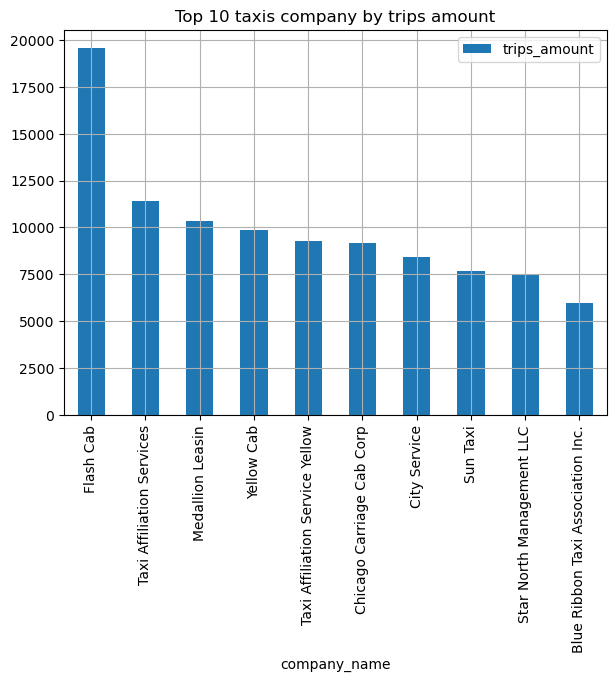

In [41]:
#Gráfica de top 10 compañias por  viajes
(    tabla_1
    .head(10)
    .plot(kind = 'bar', 
          x ='company_name', 
          title = 'Top 10 company taxis by trips amount', 
          figsize= (7,5),
          grid = True
         )
)

plt.show()

Observamos una clara preferencia por la compañia de Flash Cab, siendo su competidor más cercano la compañia de Taxi Affiliation Services y la menos popular de nuestro top es la compañia Blue Ribbon que tiene casi 4 veces menos de viajes a comparación de Flash Cab

## Gráfica de barrios por número de viajes finalizados]<a id ='grafica_2'></a>

In [42]:
# Principales Barrios
tabla_2.sort_values(by = "average_trips", ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


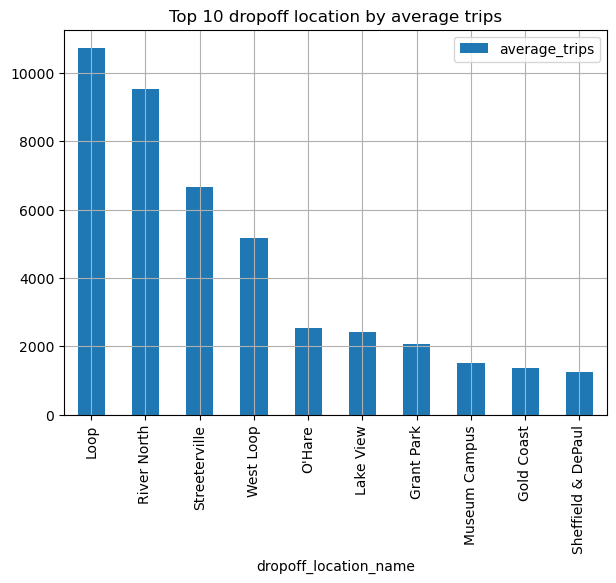

In [43]:
#Gráfica de top 10 barrios por promedio de viajes
(
    tabla_2
    .head(10)
    .plot(kind = 'bar', 
          x ='dropoff_location_name', 
          title = 'Top 10 dropoff location by average trips', 
          figsize= (7,5),
          grid = True
         )
)

plt.show()

Observamos que de nuestro top 10 los lugares más populares son el barrio de Loop y River North, después de vemos como los viajes van bajando considerablemente para los otros barrios hasta llegar a los barrios de Museum Campus, Gold Coast y Sheffiel & DePaul que tienen valores cercanos

# Prueba de Hipótesis<a  id='hipo'></a>

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

Para esta hipotesis nuestra hipótesis nula y alternativa serán las siguientes:

$H_0$ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto InternacionalO'Hare es igual los sábados lluviosos

$H_1$ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto InternacionalO'Hare son distintos los sábados lluviosos

Nuestro valor de significancia será:

$\alpha$ = 0.05

Nuestras poblaciones seran:

Poblacion 1: Duración promedio de viajes en día no lluviosos

Poblacion 2: Duración promedio de viajes en día lluviosos

Método a emplear: Hipótesis sobre la igualdad de las medias de dos poblaciones

In [60]:
# Prueba las hipótesis
no_raining_days = tabla_3[tabla_3['weather_conditions'] == 'Good']['duration_seconds'] #Población 1
raining_days = tabla_3[tabla_3['weather_conditions'] == 'Bad']['duration_seconds'] #Población 2
alpha = 0.05# tu código: establece un nivel crítico de significación estadística

#aplicación de método para la obtención del P-value
results = st.ttest_ind(raining_days, no_raining_days,equal_var = False)
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula


Al rechazar nuestra hipótesis nula, podemos decir que la duración promedio de los viajes cambia los sábados lluviosos

# Conclusión Final<a id='final_conclution'></a>

En este trabajo contamos con un total de tres tables las cuales no contenían valores nulos, y solo una tabla tenía el formato inadecuado (columna `start_ts`)

Realizamos dos gráficas en donde pudimos observar lo siguiente:
1. Vimos una preferencia de los usuarios para utilizar Flash Cab, siendo su competidor más cercano la compañia de Taxi Affiliation Services y la menos popular de nuestro top es la compañia Blue Ribbon que tiene casi 4 veces menos de viajes a comparación de Flash Cab

2. Los barrios en donde se dan la mayor cantidad de viajes son los barrios

Hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

Para nuestra hipótesis utilizamos un nivel de significancia de 0.05 y aplicamos el método de "hipótesis sobre la igualdad de las medias" debido a que queremos averiguar si son distintos el promedio de viaje en dísa lluviosos o no, dando como resultado el rechazo de la hipótesis nula, por lo que pudemos confirmar que e distinto el número de viajes en sabados lluviosos de los que o llueve